## Name : Pratik Balaji Mahavarkar  ,  pratikmahavarkar@gmail.com
### Data Science Intern  ,  ML Project(ML-MAJOR-MAY)

##### !!! Some of the take a lot of time to run so in the final run of this file I have executed only the cells that dont take a lot of time. Time taken is mentioned in the cells and maybe the outputs show it too. After creating the final model I saved it using pickle library in a file and loaded it in the final run to show the result. 

### Problem : Create a SVM model to classify images of digits from given digits dataset.

### This is supervised learning problem with multi-class classification task.
Lets import required libraries and take a look at the dataset.


In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
digit_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/digit_svm.csv')

In [ ]:
digit_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### The first column in our dataset('label') is out target variable. Rest of the columns/feauters are values of pixels of an image.

In [ ]:
digit_data.iloc[0, 1:]

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 784, dtype: int64

In [ ]:
np.unique(np.asarray(digit_data.iloc[5, 1:]))

array([  0,   3,   5,   6,   7,   8,  10,  11,  18,  19,  23,  24,  25,
        26,  30,  31,  33,  35,  36,  44,  50,  58,  61,  62,  64,  67,
        72,  74,  78,  82,  83,  84,  91,  96, 103, 115, 116, 119, 123,
       124, 128, 133, 135, 141, 143, 150, 154, 156, 158, 160, 163, 164,
       165, 174, 178, 179, 189, 193, 194, 195, 197, 198, 200, 202, 203,
       204, 209, 211, 212, 214, 219, 221, 222, 228, 230, 235, 236, 238,
       239, 241, 242, 243, 244, 248, 249, 252, 254, 255])

A black & white image is an array of numbers ranging from 0 - 255. So to take a look at the images we need to first convert the instances into an array, rehsape them to the appropriate shape(here 28x28). Lets look at some examples.

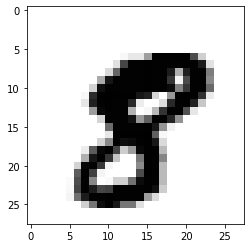

In [ ]:
plt.imshow(np.asarray(digit_data.iloc[10, 1:]).reshape(28,28), cmap='binary')  # Binary image is an image with pixel values equal to 0(white) or 1(black)
plt.show()

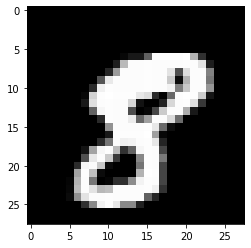

In [ ]:
plt.imshow(np.asarray(digit_data.iloc[10, 1:]).reshape(28,28), cmap='gray')      # in Gray images 0 is black and as value increases to 255 it becomes white
plt.show()

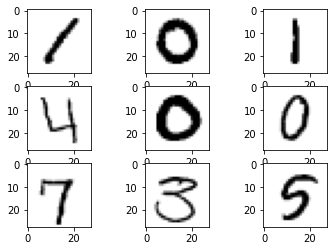

In [ ]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_arr[i].reshape(28,28), cmap='binary')

plt.show()

In [ ]:
X = digit_data.drop(['label'], axis=1)
y = digit_data.label

In [ ]:
y.unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

There are nine classes: [0,1,2,3,4,5,6,7,8,9]

In [ ]:
y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

Text(0.5, 1.0, 'Labels in digits dataset')

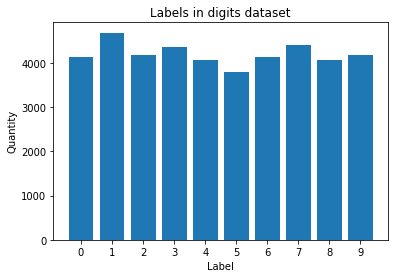

In [ ]:
unique, counts = np.unique(y, return_counts=True)
plt.bar(unique, counts)
plt.xticks(unique)
plt.xlabel("Label")
plt.ylabel("Quantity")
plt.title("Labels in digits dataset")

#### Dataset is not imbalanced. We have ample amount of data points for each class.

In [ ]:
X_arr = np.asarray(X)       # We can feed the model with dataframe or array anything is fine but with array it is easier to plot images

In [ ]:
X_arr.shape

(42000, 784)

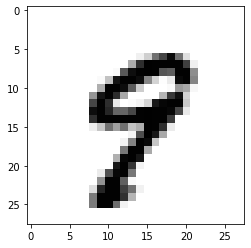

In [ ]:
plt.imshow(X_arr[11].reshape(28,28), cmap='binary')
plt.show()

Split the dataset into 3 parts **'train set'**, **'validation set'** and **'test set'**. We train the model the model using train set, check the performance on validation set then try and improve our model to get a good accuracy on validation set.Our model should not see test set until we finalize our model. Performance of the model on the test set will be the real performance of the model created.

In [ ]:
X_arr.shape[0]

42000

We have 42000 instances/data_points . Let the Train set be 80%, Validation set 10% and Test set 10% of the whole dataset. 10% of dataset is 4200.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_arr, y, test_size=4200, random_state=42)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=4200, random_state=42)

In [ ]:
X_train.shape, X_val.shape, X_test.shape

((33600, 784), (4200, 784), (4200, 784))

Text(0.5, 1.0, 'Labels in digits train dataset')

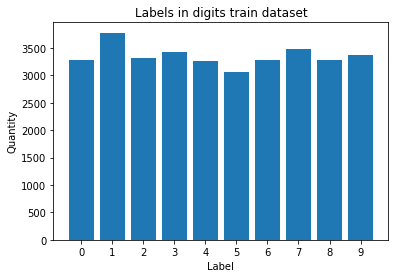

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
plt.xticks(unique)
plt.xlabel("Label")
plt.ylabel("Quantity")
plt.title("Labels in digits train dataset")

#### Distribution of data in train set is acceptable(Not skewed/imbalanced).

Lets import the required libraries and models.

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

A support vector machine (SVM) model is a supervised learning algorithm that is used to predict or classify new observations.When the response is categorical, SVM models classify data by optimizing a hyperplane that separates the classes.
It has a parameter known as kernel which takes values like 'poly', 'rbf', 'sigmoid'.Kernels helps classify non linear datasets(Our data is definitely non linear).

In [ ]:
lin_svm_clf = LinearSVC(random_state=42, dual = False) # we can use SVC(kernel='linear') but its slower than LinearSVC
poly_svm_clf = SVC(kernel='poly')    # Polynomial kernel creates polynomial features out of existing features.
rbf_svm_clf = SVC(kernel='rbf')   # rbf is default anyway  # RBF creates similarity features.

In [ ]:
import time   # to record time required to train/predict.

In [ ]:
# Evaluation
from sklearn.metrics import accuracy_score

#### LinearSVC  - BASE

In [ ]:
t0 = time.time()
lin_svm_clf.fit(X_train, y_train)
t1 = time.time()
print("Training took {:.2f}s".format(t1 - t0))           ##  Training took 1089.76s / 18 minutes

In [ ]:
# evaluating on train set
t0 = time.time()
y_pred_lin = lin_svm_clf.predict(X_train)
t1 = time.time()
print("Predicting on train set took {:.2f}s".format(t1 - t0))   ##  Predicting on train set took 0.17s
accuracy_score(y_train, y_pred_lin)                             ##  0.936875

0.936875

In [ ]:
# evaluating on validation set
t0 = time.time()
y_val_pred_lin = lin_svm_clf.predict(X_val)
t1 = time.time()
print("Predicting on validation set took {:.2f}s".format(t1 - t0))    ## Predicting on validation set took 0.12s
accuracy_score(y_val, y_val_pred_lin)                                 ##  0.9133333333333333

0.9130952380952381

#### Poly SVC   -BASE

In [ ]:
t0 = time.time()
poly_svm_clf.fit(X_train, y_train)
t1 = time.time()
print("Training took {:.2f}s".format(t1 - t0))         # Training took 234.38s / 4 minutes

Training took 234.38s


In [ ]:
# evaluating on train set
t0 = time.time()
y_pred_poly = poly_svm_clf.predict(X_train)
t1 = time.time()
print("Predicting on train set took {:.2f}s".format(t1 - t0))           # Predicting on train set took 284.76s / 4.7 minutes

Predicting on train set took 284.76s


In [ ]:
accuracy_score(y_train, y_pred_poly)

0.9907440476190477

In [ ]:
# evaluating on validation set
t0 = time.time()
y_val_pred_poly = poly_svm_clf.predict(X_val)
t1 = time.time()
print("Predicting on validation set took {:.2f}s".format(t1 - t0))
accuracy_score(y_val, y_val_pred_poly)                             # Predicting on validation set took 35.59s

Predicting on validation set took 35.59s


0.9742857142857143

#### RBF SVC   -BASE

In [ ]:
t0 = time.time()
rbf_svm_clf.fit(X_train, y_train)
t1 = time.time()
print("Training took {:.2f}s".format(t1 - t0))              # Training took 224.24s / 3.7 minutes

Training took 224.24s


In [ ]:
# evaluating on train set
t0 = time.time()
y_pred_rbf = rbf_svm_clf.predict(X_train)
t1 = time.time()
print("Predicting on train set took {:.2f}s".format(t1 - t0))     # Predicting on train set took 376.05s / 6.2 minutes
accuracy_score(y_train, y_pred_rbf)

Predicting on train set took 376.05s


0.9883035714285714

In [ ]:
# evaluating on validation set
t0 = time.time()
y_val_pred_rbf = rbf_svm_clf.predict(X_val)
t1 = time.time()
print("Predicting on validation set took {:.2f}s".format(t1 - t0))    # Predicting on validation set took 47.03s
accuracy_score(y_val, y_val_pred_rbf)

Predicting on validation set took 47.03s


0.9769047619047619

##### We can see that the models are slightly overfitting the training set
> Performance on validation dataset is slightly worse than training dataset

### SVM works better if the data it is training on is scaled, but this is not guaranteed . The model may perform worse after the data is scaled(might loose some important information). That is why we should try creating a model before scaling.

## Before scaling lets look at the features of the data.

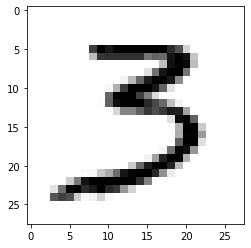

In [ ]:
plt.imshow(X_arr[25].reshape(28,28), cmap='binary')
plt.show()

In [ ]:
X_arr[25]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0, 192, 254, 230, 254, 254, 255, 254, 254,
       254, 254, 212, 174,  42,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  64, 202, 207, 207, 20

There are too many features that are not necessary, their values are set to zero i.e. the white part from the images above. We don't need them, so lets keep only those features that are necessary.
### Lets perform PCA(Principal Component Analysis) and keep the features that contain 99% of the information/explained_variance of the data. PCA is a dimensionality reduction technique. It uses SVD(Singular Value Decomposition) to compress the data/ to choose the features that explain the most of the variance in the data.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=0.99)        # retrieve 99% of variance

In [ ]:
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

In [ ]:
X_train_pca.shape, X_val_pca.shape, X_test_pca.shape

((33600, 330), (4200, 330), (4200, 330))

In [ ]:
len(pca.components_)

330

### Wow look at that, we reduced number of features to less than half(784 to 330) and still have 99% of the information. This will really help with the computations.

## Poly SVM  -after PCA

In [ ]:
t0 = time.time()
poly_svm_clf.fit(X_train_pca, y_train)
t1 = time.time()
print("Training took {:.2f}s".format(t1 - t0))

Training took 196.08s


In [ ]:
# evaluating on train set
t0 = time.time()
y_pred_poly = poly_svm_clf.predict(X_train_pca)
t1 = time.time()
print("Predicting on train set took {:.2f}s".format(t1 - t0))
accuracy_score(y_train, y_pred_poly)

Predicting on train set took 182.47s


0.9960119047619047

In [ ]:
# evaluating on validation set
t0 = time.time()
y_val_pred_poly = poly_svm_clf.predict(X_val_pca)
t1 = time.time()
print("Predicting on validation set took {:.2f}s".format(t1 - t0))
accuracy_score(y_val, y_val_pred_poly)

Predicting on validation set took 22.87s


0.9811904761904762

## RBF SVM   -after PCA

In [ ]:
t0 = time.time()
rbf_svm_clf.fit(X_train_pca, y_train)
t1 = time.time()
print("Training took {:.2f}s".format(t1 - t0))

Training took 119.82s


In [ ]:
# evaluating on train set
t0 = time.time()
y_pred_rbf = rbf_svm_clf.predict(X_train_pca)
t1 = time.time()
print("Predicting on train set took {:.2f}s".format(t1 - t0))
accuracy_score(y_train, y_pred_rbf)

Predicting on train set took 172.10s


0.9930059523809524

In [ ]:
# evaluating on validation set
t0 = time.time()
y_val_pred_rbf = rbf_svm_clf.predict(X_val_pca)
t1 = time.time()
print("Predicting on validation set took {:.2f}s".format(t1 - t0))
accuracy_score(y_val, y_val_pred_rbf)

Predicting on validation set took 21.63s


0.9797619047619047

#### We can see that PCA has helped reduce the computation time. Training is faster and so are predictions.

## Now lets see if scaling the dataset helps .Lets use Standard Scaler.
!!! Remember this may or may not help

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler1 = StandardScaler()

In [ ]:
X_train_scaled= scaler1.fit_transform(X_train)
X_val_scaled = scaler1.transform(X_val)
X_test_scaled = scaler1.transform(X_test)

In [ ]:
scaler2 = StandardScaler()

X_train_pca_scaled= scaler2.fit_transform(X_train_pca)
X_val_pca_scaled = scaler2.transform(X_val_pca)
X_test_pca_scaled = scaler2.transform(X_test_pca)

#### Poly SVC  -Scaled (without PCA)

In [ ]:
t0 = time.time()
poly_svm_clf.fit(X_train_scaled, y_train)
t1 = time.time()
print("Training took {:.2f}s".format(t1 - t0))         ## Training took 759.60s

Training took 759.60s


In [ ]:
# evaluating on train set
t0 = time.time()
y_pred_poly = poly_svm_clf.predict(X_train_scaled)
t1 = time.time()
print("Predicting on train set took {:.2f}s".format(t1 - t0))
accuracy_score(y_train, y_pred_poly)

Predicting on train set took 618.02s


0.9717559523809524

In [ ]:
# evaluating on validation set
t0 = time.time()
y_val_pred_poly = poly_svm_clf.predict(X_val_scaled)
t1 = time.time()
print("Predicting on validation set took {:.2f}s".format(t1 - t0))
accuracy_score(y_val, y_val_pred_poly)

Predicting on validation set took 77.18s


0.9507142857142857

#### Scaling the data did not help this model(SVC(kernel='poly')) rather it made it worse.It also took a lot longer to train the model.Also took more time to make the predictions. 

 It is unlikely that scaling will help SVM with rbf(Radial Basis Function) kernel. 
 I checked it anyway (when I wasn't recording time) and found that scaling did not hep rbf either.

Below is the code to check. **Warning**: It takes lot of time to check/run the cells below depending on the hardware obviously.

#### RBF SVC  -Scaled (without PCA)

In [ ]:
t0 = time.time()
rbf_svm_clf.fit(X_train_scaled, y_train)
t1 = time.time()
print("Training took {:.2f}s".format(t1 - t0))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# evaluating on train set
t0 = time.time()
y_pred_rbf = rbf_svm_clf.predict(X_train_scaled)
t1 = time.time()
print("Predicting on train set took {:.2f}s".format(t1 - t0))
accuracy_score(y_train, y_pred_rbf)                                  ##  0.9849404761904762

0.9849404761904762

In [ ]:
# evaluating on validation set
t0 = time.time()
y_val_pred_rbf = rbf_svm_clf.predict(X_val_scaled)
t1 = time.time()
print("Predicting on validation set took {:.2f}s".format(t1 - t0))
accuracy_score(y_val, y_val_pred_rbf)                               ##  0.9614285714285714

0.9614285714285714

##### Scaling the data did not help this model(SVC(kernel='rbf')) rather it made it worse.
##### Lets scale the compressed dataset and see if scaling helps this one(compressed dataset).

#### Poly SVC  -Scaled (with/after PCA)

In [ ]:
t0 = time.time()
poly_svm_clf.fit(X_train_pca_scaled, y_train)
t1 = time.time()
print("Training took {:.2f}s".format(t1 - t0))    ##  Training took 1194.97s

Training took 1194.97s


In [ ]:
# evaluating on train set
t0 = time.time()
y_pred_poly = poly_svm_clf.predict(X_train_pca_scaled)
t1 = time.time()
print("Predicting on train set took {:.2f}s".format(t1 - t0))    ##  Predicting on train set took 554.68s
accuracy_score(y_train, y_pred_poly)                             ##  0.9941666666666666

Predicting on train set took 554.68s


0.9941666666666666

In [ ]:
# evaluating on validation set
t0 = time.time()
y_val_pred_poly = poly_svm_clf.predict(X_val_pca_scaled)
t1 = time.time()
print("Predicting on validation set took {:.2f}s".format(t1 - t0))     ##  Predicting on validation set took 69.28s
accuracy_score(y_val, y_val_pred_poly)                                 ##  0.8926190476190476

Predicting on validation set took 69.28s


0.8926190476190476

### We have seen this behaviour before. This means scaling will not help rbf kernel model either.

Warning: Following code takes a long time to run

#### RBF SVC  -Scaled (with/after PCA)

In [ ]:
t0 = time.time()
rbf_svm_clf.fit(X_train_pca_scaled, y_train)
t1 = time.time()
print("Training took {:.2f}s".format(t1 - t0))

In [ ]:
# evaluating on train set
t0 = time.time()
y_pred_rbf = rbf_svm_clf.predict(X_train_pca_scaled)
t1 = time.time()
print("Predicting on train set took {:.2f}s".format(t1 - t0))
accuracy_score(y_train, y_pred_rbf)

In [ ]:
# evaluating on validation set
t0 = time.time()
y_val_pred_rbf = rbf_svm_clf.predict(X_val_pca_scaled)
t1 = time.time()
print("Predicting on validation set took {:.2f}s".format(t1 - t0))
accuracy_score(y_val, y_val_pred_rbf)

#### From the above steps we can draw some conclusions here.
1. Scaling does not help here in any way. It reduces the performances of the models and takes longer time to train and predict.
2. Linear SVC takes a long time to train but less time to predict. Performance of this model is a lot less than other models(poly,rbf kernels).
3. Polynomial kernel SVM and RBF kernel SVM models, both show impressive performances on train set as well as validation set with acceptable amount of time taken to train and predict.
4. Poly and RBF base models are good but perform better after dimensionality reduction i.e after applying PCA. Applying PCA also helped reduce time taken for training and predictions.

#### Poly model best performance(till now) on val set = 98.12 %
#### RBF model best performance(till now) on val set = 97.98 %
This may be good but we should try some different parameters for the models we have used to see if they can do better.

## Hyperparameter Tuning

### Poly SVM

#### We will use RandomSearchCV for this.It is as good as GridSeasrchCV and faster.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
poly_param_grid = {
    'degree': [2,3,4,5],
    'C': [0.1,1,5,10],
    'coef0': [0.5,1,2]            # controls how much the model is influenced by high-degree polynomials
}

In [ ]:
poly_random_searchcv = RandomizedSearchCV(poly_svm_clf, poly_param_grid, n_iter=10, scoring='accuracy',cv=3, verbose = 1, n_jobs=-1, random_state=42, return_train_score=True)

In [ ]:
t0 = time.time()
poly_random_searchcv.fit(X_train_pca, y_train)
t1 = time.time()
print("Training took {:.2f}s".format(t1 - t0))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 47.5min finished


Training took 3021.14s


In [ ]:
poly_random_searchcv.best_estimator_

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.5,
    decision_function_shape='ovr', degree=5, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
poly_random_searchcv.best_score_

0.9789285714285714

In [ ]:
# evaluating on train set
t0 = time.time()
y_val_pred_poly = poly_random_searchcv.best_estimator_.predict(X_val_pca)
t1 = time.time()
print("Predicting on train set took {:.2f}s".format(t1 - t0))
accuracy_score(y_val, y_val_pred_poly) 

Predicting on train set took 22.97s


0.9828571428571429

### RBF SVM

It takes hours to run the cells below !!!

In [ ]:
rbf_param_grid = {
    'gamma': [1, 0.1, 0.01, 0.001],
    'C': [0.1, 1, 10, 100]
}

In [ ]:
rbf_random_searchcv = RandomizedSearchCV(rbf_svm_clf, rbf_param_grid, n_iter=10, scoring='accuracy',cv=3, verbose = 2, n_jobs=-1, random_state=42, return_train_score=True)

In [ ]:
t0 = time.time()
rbf_random_searchcv.fit(X_train_pca, y_train)
t1 = time.time()
print("Training took {:.2f}s".format(t1 - t0))

In [ ]:
rbf_random_searchcv.best_estimator_

In [ ]:
# evaluating on train set
t0 = time.time()
y_val_pred_rbf = rbf_random_searchcv.best_estimator_.predict(X_val_pca)
t1 = time.time()
print("Predicting on train set took {:.2f}s".format(t1 - t0))
accuracy_score(y_val, y_val_pred_rbf) 

### The RBF SVM hyperparameter tuning takes hours to complete. Anyway POLY SVM has performed a little better than RBF SVM in many of the cases seen above. So we will continue hyperparameter tuning only for POLY SVM.

## Continue Hyperparameter tuning for POLY SVM

Performance has increased with increase in 'degree' parameter i.e polynomial features created from original feautres help. Lets check for higher order polynomials.

In [ ]:
poly_param_grid2 = {
    'degree': [6,7],
    'C': [1,5,10],
    'coef0': [0.25,0.5,1]
}

In [ ]:
poly_random_searchcv = RandomizedSearchCV(poly_svm_clf, poly_param_grid2, n_iter=10, scoring='accuracy',cv=3, verbose = 2, n_jobs=-1, random_state=42, return_train_score=True)

In [ ]:
t0 = time.time()
poly_random_searchcv.fit(X_train_pca, y_train)
t1 = time.time()
print("Training took {:.2f}s".format(t1 - t0))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 86.8min finished


Training took 5339.86s


In [ ]:
poly_random_searchcv.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=6, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
poly_random_searchcv.best_score_

0.9782738095238095

In [ ]:
# evaluating on train set
t0 = time.time()
y_val_pred_poly = poly_random_searchcv.best_estimator_.predict(X_val_pca)
t1 = time.time()
print("Predicting on train set took {:.2f}s".format(t1 - t0))
accuracy_score(y_val, y_val_pred_poly) 

Predicting on train set took 20.56s


0.9835714285714285

The best estimator from above training has 'degree' = 6, 'C' = 10, 'coef0' = 1 as its parameters.Higher values of C and coef0 may help but the computations takes a lot of time. So we will stop here and take this estimator as our final model.

In [ ]:
final_model = poly_random_searchcv.best_estimator_

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_val, y_val_pred_poly)

array([[433,   0,   0,   0,   0,   0,   0,   0,   1,   1],
       [  0, 429,   1,   0,   1,   0,   0,   1,   1,   0],
       [  1,   2, 432,   1,   0,   1,   0,   1,   0,   0],
       [  0,   0,   2, 396,   0,   6,   0,   1,   1,   2],
       [  0,   0,   1,   0, 394,   0,   3,   1,   0,   4],
       [  0,   0,   0,   3,   0, 380,   1,   0,   0,   1],
       [  2,   0,   0,   0,   2,   0, 442,   0,   0,   0],
       [  0,   1,   2,   0,   0,   0,   0, 464,   0,   7],
       [  1,   0,   1,   0,   0,   1,   1,   1, 379,   1],
       [  2,   1,   0,   0,   2,   1,   0,   4,   1, 382]])

In [ ]:
print(classification_report(y_val, y_val_pred_poly))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       435
           1       0.99      0.99      0.99       433
           2       0.98      0.99      0.99       438
           3       0.99      0.97      0.98       408
           4       0.99      0.98      0.98       403
           5       0.98      0.99      0.98       385
           6       0.99      0.99      0.99       446
           7       0.98      0.98      0.98       474
           8       0.99      0.98      0.99       385
           9       0.96      0.97      0.97       393

    accuracy                           0.98      4200
   macro avg       0.98      0.98      0.98      4200
weighted avg       0.98      0.98      0.98      4200



In [ ]:
import joblib
import pickle

In [ ]:
filename = 'finalized_digits_svm_model.sav'
pickle.dump(final_model, open(filename, 'wb'))

### We have created our model(final) and saved. Lets load it and check its performance on the test dataset(unseen data)

In [ ]:
filename = 'finalized_digits_svm_model.sav'
loaded_model = joblib.load('/content/drive/MyDrive/finalized_digits_svm_model.sav')
result = loaded_model.score(X_test_pca, y_test)

In [ ]:
result

0.9809523809523809

In [ ]:
y_test_pred = loaded_model.predict(X_test_pca)
accuracy_score(y_test, y_test_pred)

0.9809523809523809

In [ ]:
conf_mat = confusion_matrix(y_test, y_test_pred)
conf_mat

array([[404,   0,   0,   1,   1,   0,   1,   0,   1,   0],
       [  0, 469,   0,   0,   0,   0,   1,   1,   0,   0],
       [  1,   0, 409,   0,   4,   0,   0,   2,   3,   1],
       [  0,   0,   2, 493,   0,   5,   0,   2,   2,   2],
       [  0,   0,   0,   0, 389,   1,   1,   0,   0,   6],
       [  0,   0,   0,   5,   0, 332,   0,   0,   0,   2],
       [  1,   0,   0,   0,   0,   1, 397,   0,   3,   0],
       [  0,   2,   2,   0,   2,   0,   0, 428,   1,   3],
       [  0,   0,   1,   2,   2,   1,   0,   1, 396,   0],
       [  0,   0,   1,   3,   3,   0,   0,   5,   1, 403]])

<Figure size 720x720 with 0 Axes>

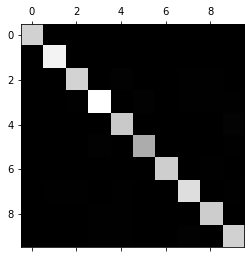

In [ ]:
plt.figure(figsize = (10,10))
plt.matshow(conf_mat, cmap = plt.cm.gray)
plt.show()

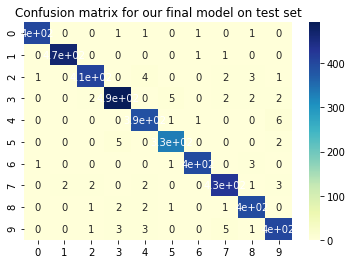

In [ ]:
import seaborn as sns
plt.title('Confusion matrix for our final model on test set')
sns.heatmap(conf_mat, annot=True, cmap="YlGnBu")
plt.show()

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       408
           1       1.00      1.00      1.00       471
           2       0.99      0.97      0.98       420
           3       0.98      0.97      0.98       506
           4       0.97      0.98      0.97       397
           5       0.98      0.98      0.98       339
           6       0.99      0.99      0.99       402
           7       0.97      0.98      0.98       438
           8       0.97      0.98      0.98       403
           9       0.97      0.97      0.97       416

    accuracy                           0.98      4200
   macro avg       0.98      0.98      0.98      4200
weighted avg       0.98      0.98      0.98      4200



## So the accuracy of our model on the unseen data is (** 98.1% **). This is actually a good performance by our model.
### Precision and Recall scores for all the classes are good resulting in a good F1-score too.

## Below is pipeline for predicting on the compressed data after loading the model and also another pipeline that will train our model from scratch and be ready for the predictions.

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline1 = Pipeline([
                     ('PCA', pca),
                     ('model', loaded_model)
])                                          ## This pipeline will directly do the predictions as its estimators have already been trained.

In [ ]:
pipeline2 = Pipeline([
                      ('PCA', PCA(n_components=0.99)),
                      ('SVC', SVC(kernel='poly', degree=6, C = 10, coef0=1))
])                      ## This pipeline will train your data and then be ready for predictions.
pipeline2.fit(X_train, y_train)
pipeline2.score(X_val, y_val)